# Evidence for moral hazard in coronavirus data?
## An exercise in data visualisation

I am going to attempt to determine whether there is evidence for population-wide moral hazard in Covid-19 testing in the UK and the UAE, i.e. whether there is attempted abuse of the testing system to gain time off work or education.

To do this, I will use the variables 'new_tests_per_thousand' (as well as the smoothed version). For part 4. I will use a visualisation of the 'new_cases' variable to explain what is being seen in the 'new test' data.

Possible scenarios that may support this are as follows:
Significantly more tests are taken during 'holidays' (during summer months, for example).
Similarly, significantly more tests are taken directly after 'holidays' (extending the 'holiday', or avoiding returning to work quickly, i.e. in the new year).

I will be using the school holidays to roughly gage the 'holiday' times in the UK. For reference, the (rough) dates for school terms/holidays in the UK were as follows:

2020
    Summer break: 22 July to 2 September;
    Winter break: 19 December to 3 January;
2021
    Spring break: 4-17 April;
    Summer break: 24 July to 1 September;
    Winter break: 17 December to 3 January;

For the UAE:

2020
    Summer break: 12 April to 2 July;
    Winter break: 13 December to 30th December;
2021
    Spring break: 28 March to 15 April;
    Summer break: July 1st;
    Winter break: 12–30 December 2021
    
### 1. and 2.

In [10]:
import pandas as pd

df=pd.read_csv('../data/owid-covid-data.csv', index_col=3)
df_unitedk=df.loc[df['location'] == 'United Kingdom']
df_unitedae=df.loc[df['location'] == 'United Arab Emirates']

df_uk=df_unitedk[['new_tests_per_thousand']]
df_uae=df_unitedae[['new_tests_per_thousand']]
df_uk_s=df_unitedk[['new_tests_smoothed_per_thousand']]
df_uae_s=df_unitedae[['new_tests_smoothed_per_thousand']]

df_uk=df_uk.rename(columns={'new_tests_per_thousand':'new_tests_uk'})
df_uae=df_uae.rename(columns={'new_tests_per_thousand':'new_tests_uae'})
df_uk_s=df_uk_s.rename(columns={'new_tests_smoothed_per_thousand':'new_tests_uk_s'})
df_uae_s=df_uae_s.rename(columns={'new_tests_smoothed_per_thousand':'new_tests_uae_s'})

import datetime
df=df_uk.join(df_uae)
df = df.fillna(0).astype(int)
df.index = pd.to_datetime(df.index)
df = (df.sort_index())[:'2022-01-11'] # 2022-01-11 is the most recent date with full data provided by both countries

df_s=df_uk_s.join(df_uae_s)
df_s = df_s.fillna(0).astype(int)
df_s.index = pd.to_datetime(df_s.index)
df_s = (df_s.sort_index())[:'2022-01-11']

### 3. Comparing data between UK and UAE

Text(0.5, 1.0, 'Fig 1: New tests per thousand in the UK and UAE')

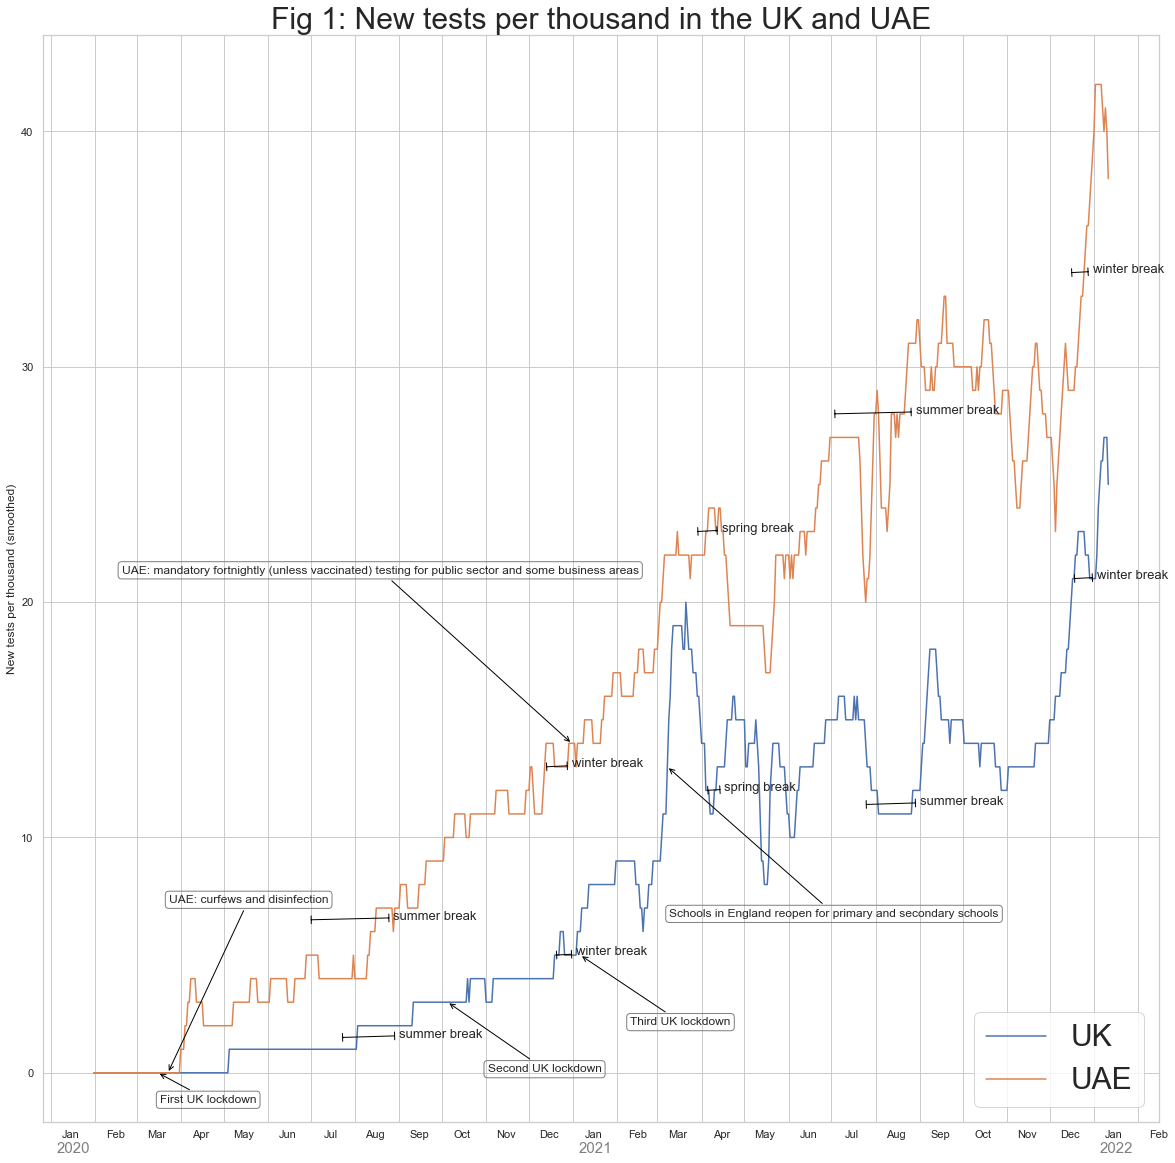

In [19]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

style = dict(size=15, color='gray')
sns.set(style='whitegrid',rc = {'figure.figsize':(20,20)})
plt.plot(df_s)

#labelling the years
plt.gca().text(np.datetime64('2020-01-05'),-3.4, '2020', **style)
plt.gca().text(np.datetime64('2021-01-05'),-3.4, '2021', **style)
plt.gca().text(np.datetime64('2022-01-05'),-3.4, '2022', **style)

#labelling periods of time
def label_period(text, start_date, end_date, ycoord):
    i=np.datetime64(start_date)
    j=np.datetime64(end_date)
    plt.gca().annotate(text, xy=(i, ycoord), xytext=(j, ycoord),
            xycoords='data', textcoords='data', size=13,
            arrowprops={'color':'black','arrowstyle':'|-|,widthA=0.3,widthB=0.3'})

    #labelling relevent events
def label_event(text, date, ycoord, xpos,ypos):
    plt.gca().annotate(text, xy=(np.datetime64(date), ycoord),  xycoords='data',bbox=dict(boxstyle="round", fc="none", ec="gray"),
                xytext=(xpos, ypos), textcoords='offset points',
                arrowprops={'color':'black','arrowstyle':"->"})
    
# school holidays for the UK
label_period('summer break','2020-07-22','2020-09-01',1.5)
label_period('winter break','2020-12-19','2021-01-03',5)
label_period('spring break','2021-04-04', '2021-04-17',12)
label_period('summer break','2021-07-24','2021-09-01',11.4)
label_period('winter break','2021-12-17','2022-01-03',21)

# school holidays for UAE
label_period('summer break','2020-06-30','2020-08-28',6.5)
label_period('winter break','2020-12-12','2020-12-31',13)
label_period('spring break','2021-03-28','2021-04-15',23)
label_period('summer break','2021-07-02','2021-08-29',28)
label_period('winter break','2021-12-15','2021-12-31',34)

# UK covid-related events    
label_event('First UK lockdown', '2020-03-16', 0, 2,-30)
label_event('Second UK lockdown', '2020-10-05', 3, 40,-70)
label_event('Third UK lockdown', '2021-01-06', 5, 50,-70)
label_event('Schools in England reopen for primary and secondary schools', '2021-03-08', 13,2,-150)

# UAE covid-related events
label_event('UAE: curfews and disinfection', '2020-03-23', 0, 1,170)
label_event('UAE: mandatory fortnightly (unless vaccinated) testing for public sector and some business areas', '2020-12-31', 14, -450,170)

#labelling the months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%h'))

#labelling the axes and legend
plt.ylabel('New tests per thousand (smoothed)')
plt.legend(labels=['UK','UAE'], loc='lower right',prop={'size': 30})
plt.title('Fig 1: New tests per thousand in the UK and UAE', size=30)

From this visualisation alone, there appears to be a pattern among all holidays in both countries that testing increases following each school holiday. Indeed, there are other instances (for example, the huge pick-up in testing around the reopening of primary and secondary schools in the UK) but for simplicity I am going to focus on the school holiday seasons.

Of course, there are a huge number of factors that could contribute to higher rates of testing. For example, a higher case-rate would lead to more people experiencing genuine coronavirus symptoms and therefore acting responsibly by testing themselves. 

In order to observe the relationship between the test rate and the case rate, I will visualise these for the UK and UAE seperately.

Text(0.5, 1.0, 'Fig 2: New tests per thousand vs new cases in the UK')

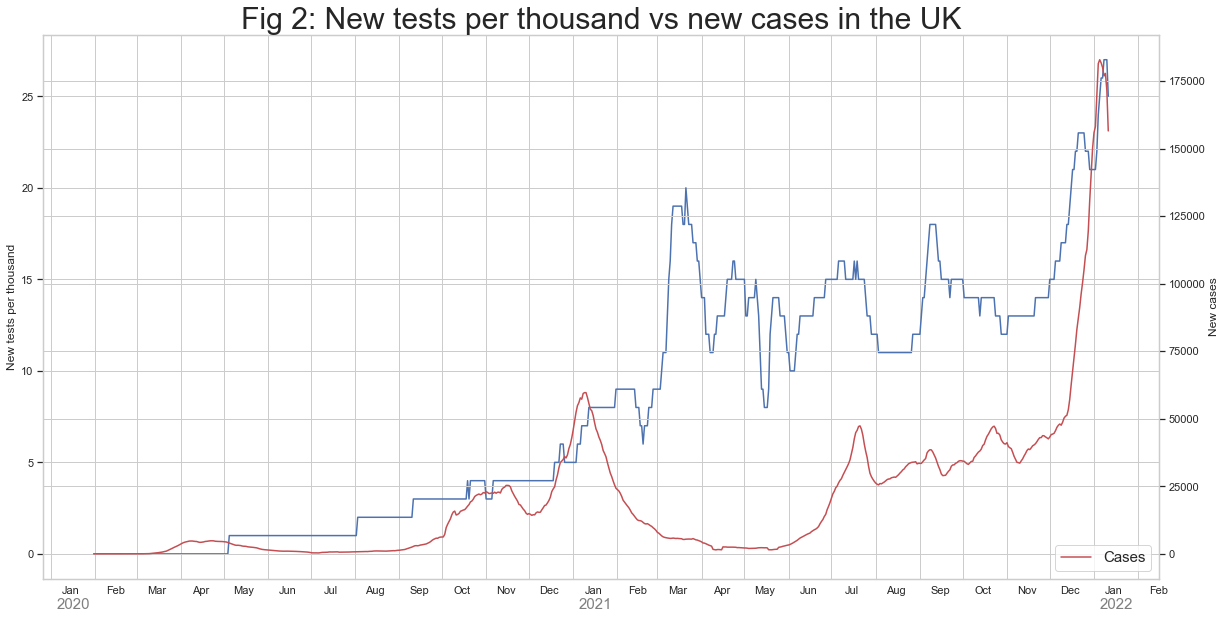

In [12]:
style = dict(size=15, color='gray')
sns.set(style='whitegrid',rc = {'figure.figsize':(20,10)})

df_uk_c=df_unitedk[['new_cases_smoothed']]
df_uae_c=df_unitedae[['new_cases_smoothed']]
df_uk_c=df_uk_c.rename(columns={'new_cases_smoothed':'new_cases_uk_s'})
df_uae_c=df_uae_c.rename(columns={'new_cases_smoothed':'new_cases_uae_s'})

df_c=df_uk_c.join(df_uae_c)
df_c = df_c.fillna(0).astype(int)
df_c.index = pd.to_datetime(df_c.index)
df_c = (df_c.sort_index())[:'2022-01-11']

x=df_c.index
y_axis_1 = df_s['new_tests_uk_s']
y_axis_2 = df_c['new_cases_uk_s']

fig, ax_1 = plt.subplots()

plt.gca().text(np.datetime64('2020-01-05'),-3, '2020', **style)
plt.gca().text(np.datetime64('2021-01-05'),-3, '2021', **style)
plt.gca().text(np.datetime64('2022-01-05'),-3, '2022', **style)

ax_2 = ax_1.twinx()
ax_1.plot(x,y_axis_1, color='b', label='Tests')
ax_2.plot(x,y_axis_2, color='r', label='Cases')

ax_1.set_ylabel('New tests per thousand')
ax_2.set_ylabel('New cases')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%h'))

plt.legend(loc='lower right',prop={'size': 15})
plt.title('Fig 2: New tests per thousand vs new cases in the UK', size=30)

For much of this graph, it appears that in the UK the cases and the new tests are, in many places, very correlated (particularly around January 2021 and January 2022). However, there looks as if there is negative correlation between March and June 2021. For much of the data, I think case rate could explain the higher test rates (as well as many other factors such as supply of lateral flow tests, for example).

Text(0.5, 1.0, 'Fig 3: New tests per thousand vs new cases in the UAE')

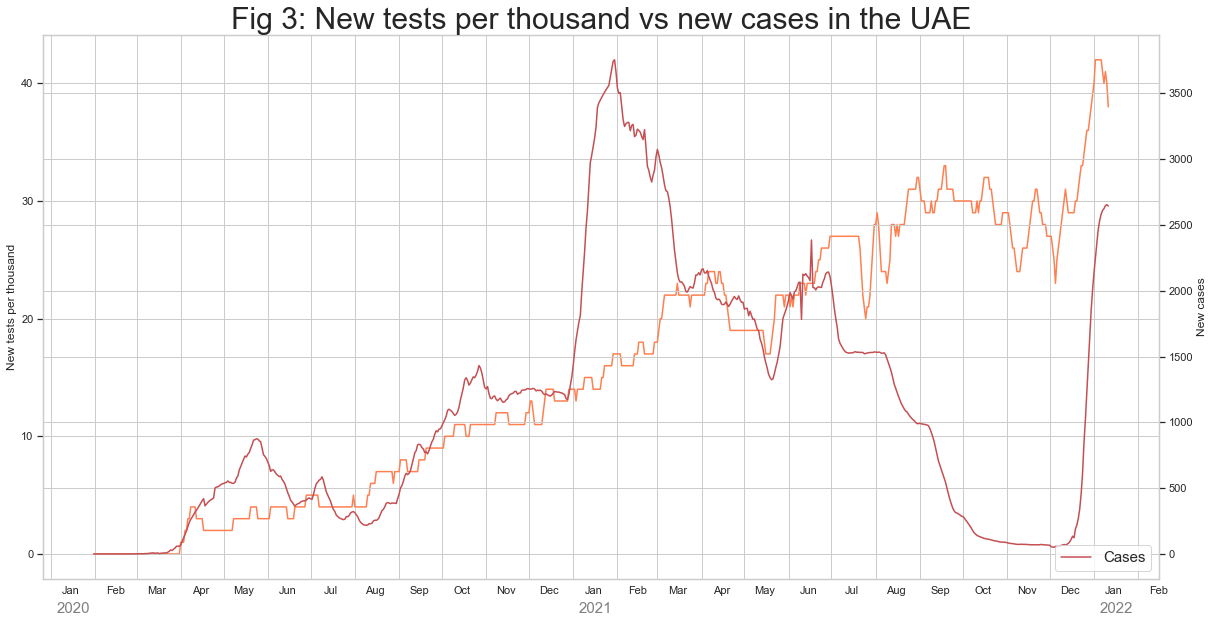

In [13]:
x=df_c.index
y_axis_1 = df_s['new_tests_uae_s']
y_axis_2 = df_c['new_cases_uae_s']

fig, ax_1 = plt.subplots()

plt.gca().text(np.datetime64('2020-01-05'),-5, '2020', **style)
plt.gca().text(np.datetime64('2021-01-05'),-5, '2021', **style)
plt.gca().text(np.datetime64('2022-01-05'),-5, '2022', **style)

ax_2 = ax_1.twinx()
ax_1.plot(x,y_axis_1, color='coral', label='Tests')
ax_2.plot(x,y_axis_2, color='r', label='Cases')

ax_1.set_ylabel('New tests per thousand')
ax_2.set_ylabel('New cases')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%h'))

plt.legend(loc='lower right',prop={'size': 15})
plt.title('Fig 3: New tests per thousand vs new cases in the UAE', size=30)

The situation in the UAE looks fairly similar to that in the UK, in that for much of the data, particularly until January 2021, the case rate and test rate act in tandem, but between Jun and November 2021 the opposite seems to be true. 

Next, I will generate what I believe to be useful statistics in demonstrating the pick-up in testing following school holidays. The dates I have chosen to sample averages from are between the first and second-to-last day of the holiday period, and then the day before the holiday ends plus two days later. For the vast majority of the UK and UAE schools, this should capture any change in testing rates before the first day back to school.

In [14]:
# Dict of holidays
uae_holidays={'summer_2020':['2020-06-30','2020-08-28'],'winter_2020':['2020-12-12','2020-12-31'],
            'spring_2021':['2021-03-28','2021-04-15'], 'summer_2021':['2021-07-02','2021-08-29'],
              'winter_2021':['2021-12-15','2021-12-31'],}
uk_holidays={'summer_2020':['2020-07-22','2020-09-01'],'winter_2020':['2020-12-19','2021-01-03'],
            'spring_2021':['2021-04-04', '2021-04-17'], 'summer_2021':['2021-07-24','2021-09-01'],
             'winter_2021':['2021-12-17','2022-01-03'],}

def to_datetime(date):
    return datetime.datetime.strptime(date, '%Y-%m-%d')

# uae_diff_tests is the difference in test rates between the afformentioned periods of time.
uae_diff_tests=[]

for key in uae_holidays:
    
    delta=to_datetime(uae_holidays[key][1])-to_datetime(uae_holidays[key][0])-datetime.timedelta(1)
    holiday_tests=df['new_tests_uae'][uae_holidays[key][0]:]
    holiday_tests=holiday_tests.head(int(delta.days))
    uae_diff_tests.append([sum(holiday_tests)/delta.days])
    
    last_holiday_day=to_datetime(uae_holidays[key][1])
    couple_days_later= last_holiday_day+datetime.timedelta(2)
    three_day_av=sum(df['new_tests_uae'][last_holiday_day:couple_days_later])/3
    uae_diff_tests[-1].append(three_day_av)

# uk_diff_tests is the difference in test rates between the afformentioned periods of time.
uk_diff_tests=[]

for key in uk_holidays:
    
    delta=to_datetime(uk_holidays[key][1])-to_datetime(uk_holidays[key][0])-datetime.timedelta(1)
    holiday_tests=df['new_tests_uk'][uk_holidays[key][0]:]
    holiday_tests=holiday_tests.head(int(delta.days))
    uk_diff_tests.append([sum(holiday_tests)/delta.days])
    
    last_holiday_day=to_datetime(uk_holidays[key][1])
    couple_days_later= last_holiday_day+datetime.timedelta(2)
    three_day_av=sum(df['new_tests_uk'][last_holiday_day:couple_days_later])/3
    uk_diff_tests[-1].append(three_day_av)

uk_increases_after_holiday=list(map((lambda list:(list[1]/list[0]-1)*100),uk_diff_tests))
uae_increases_after_holiday=list(map((lambda list:(list[1]/list[0]-1)*100),uae_diff_tests))

uk_av_increase_after_holidays=(lambda list: round(sum(list)/len(list),2))(uk_increases_after_holiday)
uae_av_increase_after_holidays=(lambda list: round(sum(list)/len(list),2))(uae_increases_after_holiday)

print(f'In the UK, there is a {uk_av_increase_after_holidays}% increase in testing between the holiday period and the first two days after plus the day before. This increase is {uae_av_increase_after_holidays}% in the UAE.')

In the UK, there is a 29.06% increase in testing between the holiday period and the first two days after plus the day before. This increase is 20.5% in the UAE.


For whatever the reason may be, there seems to be a consistent increase in testing as children return to school.

For my final analyses of this data, I am going to create another DataFrame to store the 'positive rate'; that is, the percentage of tests taken that are confirmed to be positive cases. The 'positive rate' should be a useful indicator as to whether excess testing is happening.

In [15]:
#Creating the 'positive rate' DataFrame
df_uk_nc=df_unitedk[['new_cases']]
df_uae_nc=df_unitedae[['new_cases']]
df_uk_nc=df_uk_nc.rename(columns={'new_cases':'new_cases_uk'})
df_uae_nc=df_uae_nc.rename(columns={'new_cases':'new_cases_uae'})

df_nc=df_uk_nc.join(df_uae_nc)
df_nc = df_nc.fillna(0).astype(int)
df_nc.index = pd.to_datetime(df_nc.index)
df_nc = (df_nc.sort_index())[:'2022-01-11']

df_pr_uk=pd.DataFrame()
df_pr_uk.index=df.index

values_uk=[]
for index, row in pd.DataFrame(df['new_tests_uk']).iterrows():
    if df_nc['new_cases_uk'].loc[index]==0 or df['new_tests_uk'].loc[index]==0:
        values_uk.append(0)
    else:
        values_uk.append(round(df_nc['new_cases_uk'].loc[index]/(df['new_tests_uk'].loc[index]*1000),4))

df_pr_uk.insert(0,'positive_rate_uk', values_uk)

df_pr_uae=pd.DataFrame()
df_pr_uae.index=df.index

values_uae=[]
for index, row in pd.DataFrame(df['new_tests_uae']).iterrows():
    if df_nc['new_cases_uae'].loc[index]==0 or df['new_tests_uae'].loc[index]==0:
        values_uae.append(0)
    else:
        values_uae.append(round(df_nc['new_cases_uae'].loc[index]/(df['new_tests_uae'].loc[index]*1000),4))

df_pr_uae.insert(0,'positive_rate_uae', values_uae)

I will now plot these DataFrames.

Text(0.5, 1.0, 'Fig 4: Rate of positive tests in the UAE')

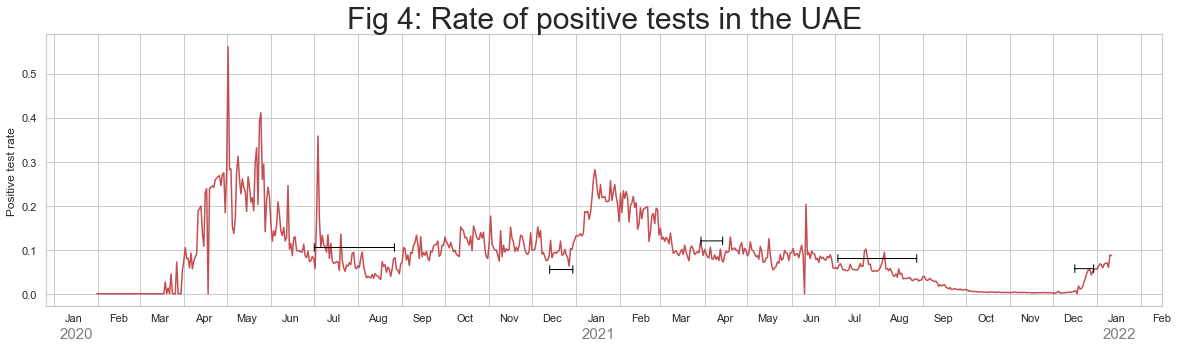

In [16]:
sns.set(style='whitegrid',rc = {'figure.figsize':(20,5)})

plt.plot(df_pr_uae, color='r')

# school holidays for UAE
label_period('','2020-06-30','2020-08-28',.105)
label_period('','2020-12-12','2020-12-31',.055)
label_period('','2021-03-28','2021-04-15',.12)
label_period('','2021-07-02','2021-08-29',.08)
label_period('','2021-12-15','2021-12-31',.057)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%h'))

plt.gca().text(np.datetime64('2020-01-05'),-.1, '2020', **style)
plt.gca().text(np.datetime64('2021-01-05'),-.1, '2021', **style)
plt.gca().text(np.datetime64('2022-01-05'),-.1, '2022', **style)

plt.ylabel('Positive test rate')
plt.title('Fig 4: Rate of positive tests in the UAE', size=30)

Visually, there doesn't appear to be a particular pattern in the 'positive rate' at the end of school holidays. 

Text(0.5, 1.0, 'Fig 5: Rate of positive tests in the UK')

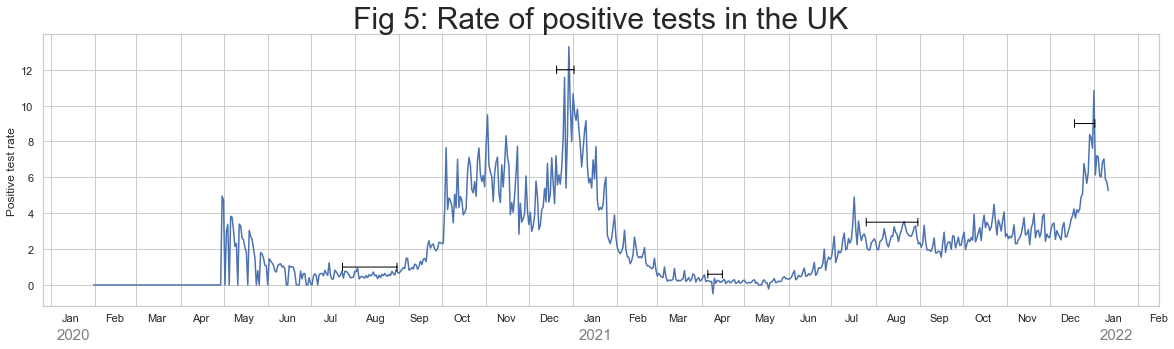

In [17]:
sns.set(style='whitegrid',rc = {'figure.figsize':(20,5)})

plt.plot(df_pr_uk)

# school holidays for UK
label_period('','2020-07-22','2020-09-01',1)
label_period('','2020-12-19','2021-01-03',12)
label_period('','2021-04-04', '2021-04-17',.6)
label_period('','2021-07-24','2021-09-01',3.5)
label_period('','2021-12-17','2022-01-03',9)


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%h'))

plt.gca().text(np.datetime64('2020-01-05'),-3, '2020', **style)
plt.gca().text(np.datetime64('2021-01-05'),-3, '2021', **style)
plt.gca().text(np.datetime64('2022-01-05'),-3, '2022', **style)

plt.ylabel('Positive test rate')
plt.title('Fig 5: Rate of positive tests in the UK', size=30)


Interestingly, there are mixed results for the UK. While the spring and summer holidays don't seem to have much impact on the 'positive rate', there is an extreme fall-off in the 'positive rate' both during the 2021 and 2022 new year, which continues through to the beginning of school terms.

Before stating my conclusion, here are some relevant facts about each country regarding Covid-19 testing.

Relevant UK Covid-19 testing information:
- free testing for all
- no law enforcing Covid-19 testing of employees, but testing may be workplace policy for some
- Covid-19 testing not required for children to attend school

Relevant UAE Covid-19 testing information:
- tests only free of charge if person has symptoms, has travelled or has been in contact with a person with a positive result.
- otherwise, tests would be 370 dirham (£73.94)
- from 2021, the public sector and some business sectors were required to test employees fortnightly

### Conclusion

The differences in 'positve rates' between the two countries is particularly interesting. The rate of positive testing in the UK reaches over 12%, whereas it barely reaches 0.5%. On the one hand, definitions of 'positive' may differ between countries, which could explain this. This seems counterintuitive since Covid-19 testing in the UAE is costly unless you display symptoms, which one would imagine would lead to a better 'positive rate' than if testing were entirely free of cost. A possible explanation for this could be that the testing system in the UAE is far less exploitable than in the UK, or that the majority of testing is carried  out by companies and not by those displaying symptoms.

Nonetheless, testing definitively increases following the return from school holidays. An enormous number of confounding factors could be at play here, such as the supply of tests, government recommendation to regularly test, enforcement of testing by schools and in workplaces, and the impact of different variants (to name only a few). 

Then, even if these pick-ups in testing really are caused by testing before returning to work or education, can this necessarily be classed as morally hazardous? Surely it is actually the responsible thing to do to take tests before returning to school or work, one could argue. While that may be the case, I believe that a widespread, genuine desire to follow government guidance would lead to a less variable (or at least more stable) rate of testing throughout school terms and throughout the working year. Certainly, to compare figures 4 and 5 visually, the UK seems to have much more cyclical testing trends than the UAE. Particularly at the turn of the new year where the rate of positive testing in the UK plummets from a peak, it certainly looks as though some people may be trying to take advantage of the testing system.